In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
L_rad = 39.7

In [3]:
with open('inp_genPION.csv','w') as f:
    f.write('PION+\n')
    arr = np.linspace(1,6,51)
    np.savetxt(f,arr,delimiter=',')

In [4]:
pd.read_csv('inp_genPION.csv')

,PION+
0,1.0
1,1.1
2,1.2
3,1.3
4,1.4
5,1.5
6,1.6
7,1.7
8,1.8
9,1.9


In [72]:
header = [str(i) for i in np.linspace(0,4990,500)] + \
    ['Energy','ltot','gammaA','gammaB','covAA','covAB','covBA','covBB','NumPeaks','Peak1','Peak2','Peak3','Peak4','Peak5']
df = pd.read_csv('DataOutputs/job2.csv',names = header)

In [73]:
df[['Energy','ltot','gammaA','gammaB','covAA','covAB','covBB','NumPeaks','Peak1','Peak2','Peak3','Peak4','Peak5']]

,Energy,ltot,gammaA,gammaB,covAA,covAB,covBB,NumPeaks,Peak1,Peak2,Peak3,Peak4,Peak5
0,10.0,0.000294,3.514315,0.458597,0.026741,0.003803,6.031297e-04,4,3.526448,5.541562,7.556675,15.617128,NaN
1,10.0,0.000338,1.469299,0.292383,0.001453,0.000375,1.236379e-04,6,2.267003,7.808564,8.816121,9.571788,11.586902
2,10.0,0.000291,2.488437,0.399097,0.020099,0.003678,7.863007e-04,5,3.778338,8.060453,9.823678,20.654912,22.418136
3,10.0,0.000259,2.789627,0.584161,0.010386,0.002438,6.569799e-04,2,3.778338,8.060453,NaN,NaN,NaN
4,10.0,0.000260,18.936720,1.781254,0.455741,0.043458,4.227245e-03,4,2.518892,9.571788,10.579345,15.113350,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,316228.0,14.561698,6.603330,0.417838,0.000467,0.000031,2.153138e-06,5,13.350126,83.123426,86.901763,98.740554,111.335013
62,316228.0,14.552345,6.962542,0.398871,0.000093,0.000006,3.482180e-07,4,14.861461,69.269521,88.413098,106.801008,NaN
63,316228.0,14.456625,7.828732,0.398051,0.002144,0.000113,6.234744e-06,7,17.632242,83.375315,87.909320,96.221662,105.541562
64,316228.0,15.460732,8.919195,0.558661,0.000470,0.000030,2.042715e-06,5,14.105793,71.284635,82.619647,96.977330,113.602015


In [98]:
np.float64

AttributeError: type object 'numpy.float64' has no attribute 'nan'

In [96]:
type(df.Peak5[0])

numpy.float64

In [110]:
count = 0
for num in df.Peak3:
    if np.isnan(num):
        count += 1
count

15

(5.0, 1000000.0)

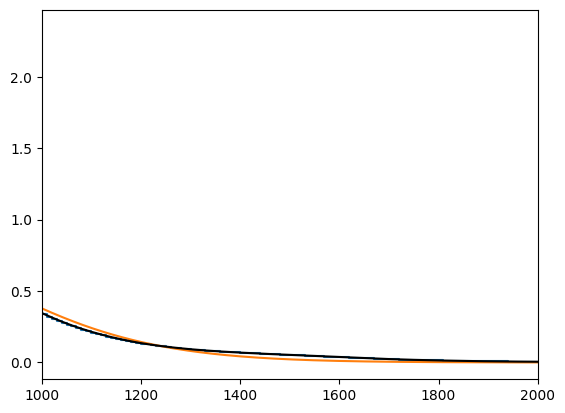

In [54]:
sn_window = 8
xvals = np.linspace(0,4990,500)
crop = 490
fine_xvals = np.linspace(0,4990 * crop/500,2000)
i = 35
run = df.iloc[i]
plt.step(xvals[:crop],run[:crop])
plt.plot(fine_xvals,sc.stats.gamma.pdf(fine_xvals/L_rad,run.gammaA,scale=1/run.gammaB)*10*run.ltot/L_rad)
plt.plot((np.arange(crop)+sn_window/2 - 1)*10,pd.Series(run[:500]).rolling(sn_window).mean().dropna()[:crop],color='black')
plt.vlines(run[-5:]*L_rad,0,run.ltot/20,color='red')
# plt.ylim(0,0.0000006)
plt.xlim(1000,2000)
from scipy import signal
smoothed_data = pd.Series(run[:500]/run.ltot).rolling(sn_window).mean().dropna()
peak_locs_raw,_ = signal.find_peaks(smoothed_data,prominence=0.004,width=3)
peak_locs_raw = (peak_locs_raw + sn_window/2 - 1) * 10/L_rad
peak_locs_raw*L_rad,run[-5:]*L_rad
plt.vlines(peak_locs_raw*L_rad,0,run.ltot/20,color='green')
run.NumPeaks,run.Energy

In [13]:
from scipy import signal
smoothed_data = pd.Series(run[:500]/run.ltot).rolling(sn_window).mean().dropna()
peak_locs_raw,_ = signal.find_peaks(smoothed_data,prominence=0.0005,width=1)
peak_locs_raw = (peak_locs_raw + sn_window/2 - 1) * 10/L_rad
peak_locs_raw*L_rad,run[-5:]*L_rad

(array([105., 215., 475.]),
 Peak1    180.0
 Peak2    440.0
 Peak3      NaN
 Peak4      NaN
 Peak5      NaN
 Name: 4, dtype: float64)

(array([1., 0., 0., 3., 1., 3., 3., 1., 5., 3., 3., 2., 5., 3., 8., 3., 3.,
        1., 2., 2., 4., 1., 1., 1., 2., 1., 2., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1.]),
 array([ 1.19735809,  1.59373798,  1.99011787,  2.38649776,  2.78287765,
         3.17925754,  3.57563743,  3.97201733,  4.36839722,  4.76477711,
         5.161157  ,  5.55753689,  5.95391678,  6.35029667,  6.74667656,
         7.14305646,  7.53943635,  7.93581624,  8.33219613,  8.72857602,
         9.12495591,  9.5213358 ,  9.91771569, 10.31409559, 10.71047548,
        11.10685537, 11.50323526, 11.89961515, 12.29599504, 12.69237493,
        13.08875482, 13.48513472, 13.88151461, 14.2778945 , 14.67427439,
        15.07065428, 15.46703417, 15.86341406, 16.25979395, 16.65617385,
        17.05255374]),
 <BarContainer object of 40 artists>)

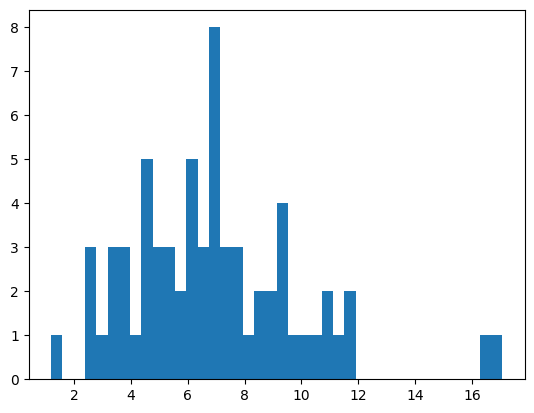

In [64]:
plt.hist(df.gammaA,bins=40)

(array([ 1.,  0.,  0.,  4.,  4.,  6.,  5., 10.,  6.,  5.,  4.,  5.,  3.,
         4.,  0.,  3.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.1574724 , 0.19701973, 0.23656705, 0.27611438, 0.3156617 ,
        0.35520903, 0.39475635, 0.43430368, 0.473851  , 0.51339833,
        0.55294565, 0.59249298, 0.6320403 , 0.67158763, 0.71113495,
        0.75068228, 0.7902296 , 0.82977693, 0.86932425, 0.90887158,
        0.9484189 , 0.98796623, 1.02751355, 1.06706088, 1.1066082 ,
        1.14615553, 1.18570285, 1.22525018, 1.26479751, 1.30434483,
        1.34389216]),
 <BarContainer object of 30 artists>)

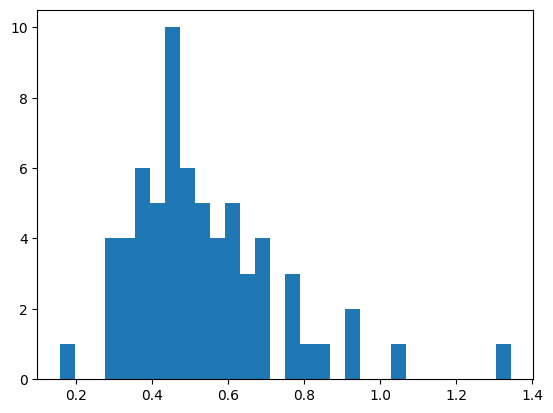

In [65]:
plt.hist(df.gammaB,bins=30)

In [ ]:
'''
------Problems!!!-------
1. Peak finding too sensitive
2. Window size perhaps too large, maybe reduce